Now let's move to the second part: climatology form the era5 for this site

In [2]:
import pandas as pd
import numpy as np
import xarray as xr

ds = xr.open_dataset("era5_all_16_3_50_8.nc")

let's show what we have here:

In [3]:
ds

<xarray.Dataset> Size: 26MB
Dimensions:     (valid_time: 662304)
Coordinates:
    latitude    float64 8B ...
    longitude   float64 8B ...
  * valid_time  (valid_time) datetime64[ns] 5MB 1950-01-02 ... 2025-07-22T23:...
Data variables:
    d2m         (valid_time) float32 3MB ...
    t2m         (valid_time) float32 3MB ...
    sp          (valid_time) float32 3MB ...
    tp          (valid_time) float32 3MB ...
    ssrd        (valid_time) float32 3MB ...
    snowc       (valid_time) float32 3MB ...
    u10         (valid_time) float32 3MB ...
    v10         (valid_time) float32 3MB ...
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            1
    GRIB_subCentre:          0
    history:                 2025-02-10T00:00 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts

Let's prepare some climatology plots for this site:

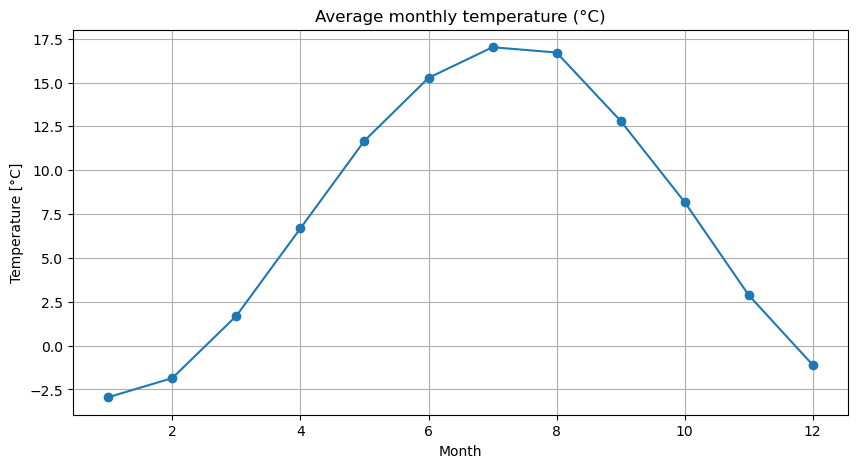

In [4]:
import matplotlib.pyplot as plt

# Temperature in Kelvin to Celsius
ds['t2m_celsius'] = ds['t2m'] - 273.15
ds['d2m_celsius'] = ds['d2m'] - 273.15

# Group by month and calculate the mean
monthly_clim = ds['t2m_celsius'].groupby('valid_time.month').mean('valid_time')


plt.figure(figsize=(10, 5))
monthly_clim.plot(marker='o')
plt.title('Average monthly temperature (°C)')
plt.xlabel('Month')
plt.ylabel('Temperature [°C]')
plt.grid(True)
plt.show()

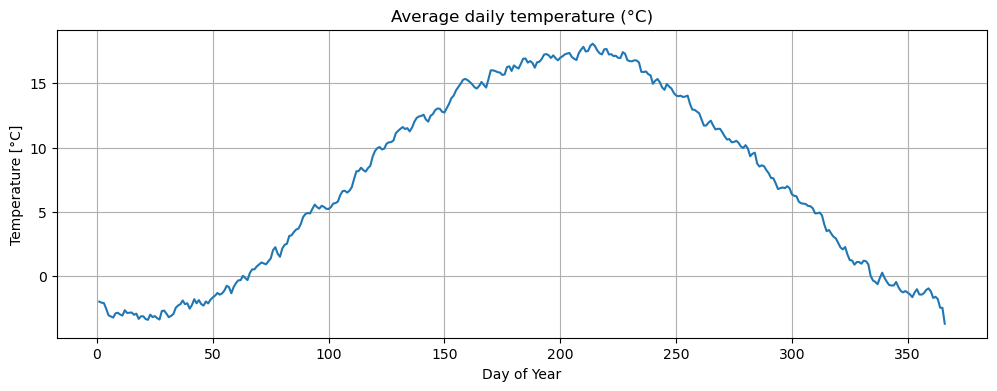

In [5]:
# (dayofyear)
daily_clim = ds['t2m_celsius'].groupby('valid_time.dayofyear').mean('valid_time')

plt.figure(figsize=(12, 4))
daily_clim.plot()
plt.title('Average daily temperature (°C)')
plt.xlabel('Day of Year')
plt.ylabel('Temperature [°C]')
plt.grid(True)
plt.show()

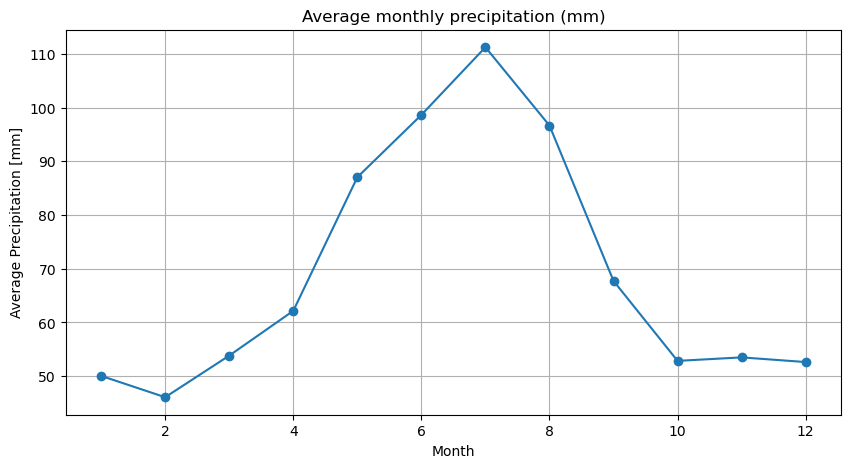

In [6]:
tp = ds['tp']  # total precipitation
tp = tp.sel(valid_time=slice('1950-01-01', '2025-01-01'))
unique_years = len(np.unique(tp['valid_time'].dt.year))
monthly_prec = tp.groupby('valid_time.month').sum()*1000 / unique_years # Convert to mm (from m to mm)

# Wykres
plt.figure(figsize=(10,5))
monthly_prec.plot(marker='o')
plt.title('Average monthly precipitation (mm)')
plt.xlabel('Month')
plt.ylabel('Average Precipitation [mm]')
plt.grid(True)
plt.show()

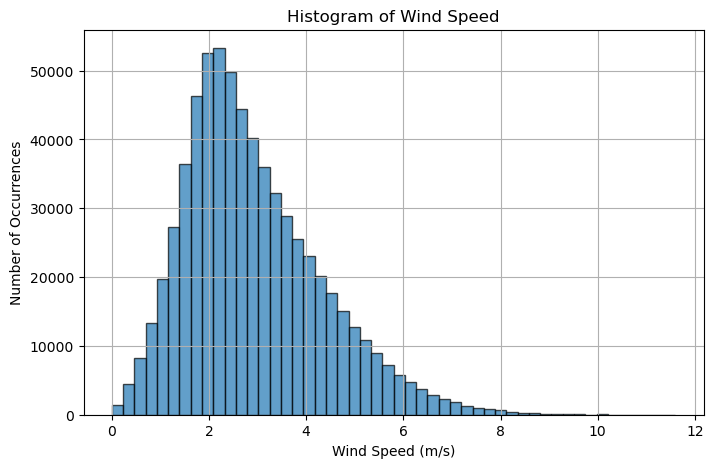

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#calculate wind speed from u10 and v10 components
wind_speed = np.sqrt(ds['u10']**2 + ds['v10']**2)

ds['wind_speed'] = wind_speed

plt.figure(figsize=(8, 5))
wind_speed.plot.hist(bins=50, alpha=0.7, edgecolor='black')
plt.title('Histogram of Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Number of Occurrences')
plt.grid(True)
plt.show()

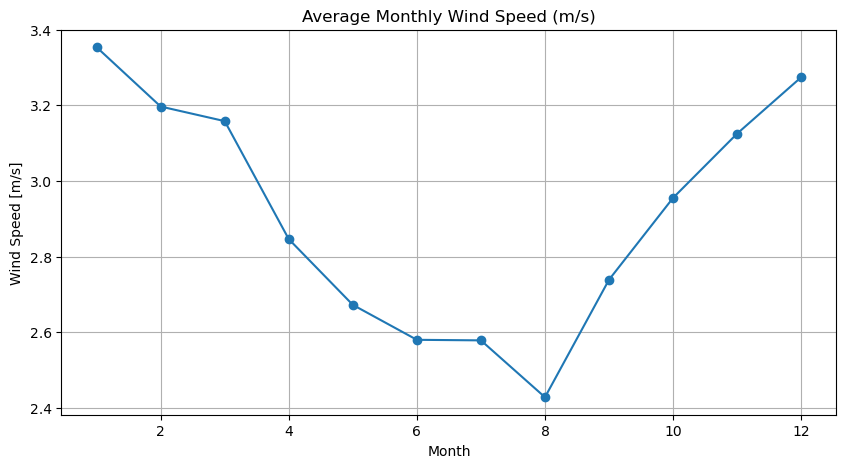

In [8]:
import numpy as np

wind_speed = np.sqrt(ds['u10']**2 + ds['v10']**2)

monthly_wind_speed = wind_speed.groupby('valid_time.month').mean(dim='valid_time')

#
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
monthly_wind_speed.plot(marker='o')
plt.title('Average Monthly Wind Speed (m/s)')
plt.xlabel('Month')
plt.ylabel('Wind Speed [m/s]')
plt.grid(True)
plt.show()


# Air Pollution Data from the Chief Inspectorate of Environmental Protection

Here we use official data on air quality and pollution levels provided by the **Chief Inspectorate of Environmental Protection (Główny Inspektorat Ochrony Środowiska - GIOŚ)** in Poland.

You can explore more details and download datasets here:  
[Air Quality Data - GIOŚ](https://powietrze.gios.gov.pl/pjp/archives)

I use here already implemented function for reading this data which is in the repository

In [9]:
from read_data import read_data
df_merged, df_avg = read_data("PM10_1g")

Wczytywanie: .\2003\2003_PM10_1g.xlsx
Wczytywanie: .\2004\2004_PM10_1g.xlsx
Wczytywanie: .\2005\2005_PM10_1g.xlsx
Wczytywanie: .\2006\2006_PM10_1g.xlsx
Wczytywanie: .\2007\2007_PM10_1g.xlsx
Wczytywanie: .\2008\2008_PM10_1g.xlsx
Wczytywanie: .\2009\2009_PM10_1g.xlsx
Wczytywanie: .\2010\2010_PM10_1g.xlsx
Wczytywanie: .\2011\2011_PM10_1g.xlsx
Wczytywanie: .\2012\2012_PM10_1g.xlsx
Wczytywanie: .\2013\2013_PM10_1g.xlsx
Wczytywanie: .\2014\2014_PM10_1g.xlsx


c:\Users\szymo\anaconda3\envs\geo\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Wczytywanie: .\2015\2015_PM10_1g.xlsx
Wczytywanie: .\2016\2016_PM10_1g.xlsx
Wczytywanie: .\2017\2017_PM10_1g.xlsx
Wczytywanie: .\2018\2018_PM10_1g.xlsx
Wczytywanie: .\2019\2019_PM10_1g.xlsx
Wczytywanie: .\2020\2020_PM10_1g.xlsx
Wczytywanie: .\2021\2021_PM10_1g.xlsx
Wczytywanie: .\2022\2022_PM10_1g.xlsx
Wczytywanie: .\2023\2023_PM10_1g.xlsx
                     DsBogChop  DsCzar07  DsCzerStraza  DsDzialoszyn  \
Data                                                                   
2003-01-01 01:00:00       90.0       4.0          13.0          32.0   
2003-01-01 02:00:00       61.0       4.0          13.0          32.0   
2003-01-01 03:00:00       75.0       4.0          12.0          34.0   
2003-01-01 04:00:00       76.0       2.0           2.0          41.0   
2003-01-01 05:00:00       79.0       2.0           2.0          41.0   
...                        ...       ...           ...           ...   
2023-12-31 20:00:00        NaN       NaN           NaN           NaN   
2023-12-31

d:\MOJE\ERA5+MLwalbrzych\read_data.py:105: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_merged = df_renamed.groupby(axis=1, level=0).mean(numeric_only=True)


                     DsBialka  DsBogChop  DsBogatFrancMOB  DsBoleslaMOB  \
Data                                                                      
2003-01-01 01:00:00       NaN       90.0              NaN           NaN   
2003-01-01 02:00:00       NaN       61.0              NaN           NaN   
2003-01-01 03:00:00       NaN       75.0              NaN           NaN   
2003-01-01 04:00:00       NaN       76.0              NaN           NaN   
2003-01-01 05:00:00       NaN       79.0              NaN           NaN   
...                       ...        ...              ...           ...   
2023-12-31 20:00:00       NaN        NaN              NaN           NaN   
2023-12-31 21:00:00       NaN        NaN              NaN           NaN   
2023-12-31 22:00:00       NaN        NaN              NaN           NaN   
2023-12-31 23:00:00       NaN        NaN              NaN           NaN   
2024-01-01 00:00:00       NaN        NaN              NaN           NaN   

                     DsC

Now we want only the data for one site: Wałbrzych in this case

<Axes: xlabel='Data'>

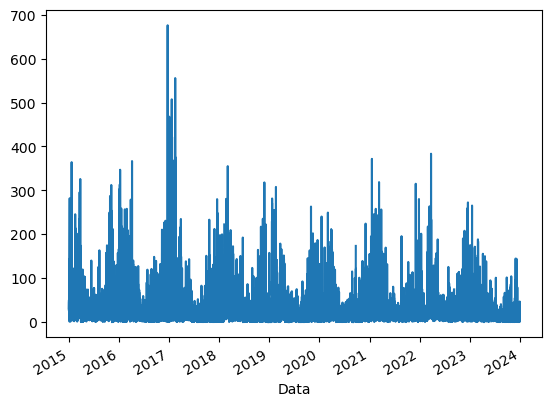

In [10]:
data_wal = df_merged["DsWalbrzWyso"]
data_wal = data_wal[data_wal.index.year > 2014]
data_wal.plot()

In [11]:
data_wal

Data
2015-01-01 00:00:00.000    31.0000
2015-01-01 01:00:00.000    37.0000
2015-01-01 02:00:00.000    29.3472
2015-01-01 03:00:00.005    31.9049
2015-01-01 04:00:00.010    33.6525
                            ...   
2023-12-31 20:00:00.000    13.9200
2023-12-31 21:00:00.000    10.5788
2023-12-31 22:00:00.000    15.0098
2023-12-31 23:00:00.000    15.9154
2024-01-01 00:00:00.000    14.5259
Name: DsWalbrzWyso, Length: 78889, dtype: float64

Now we prepare the data so that it will be bether for our machime learning model

In [12]:
# Convert xarray dataset to pandas DataFrame
df_meteo = ds.to_dataframe().reset_index()
# Set 'valid_time' as index and convert to datetime
df_meteo = df_meteo.set_index('valid_time')
df_meteo.index = pd.to_datetime(df_meteo.index)
# Optional: Filter data to keep only records from 2015 onwards
df_meteo = df_meteo[df_meteo.index >= '2015-01-01']

data_wal.index = pd.to_datetime(data_wal.index)
df_pm10 = data_wal.rename("pm10")

# Join meteorological data with PM10 data
df_full = df_meteo.join(df_pm10, how='inner')

df_full['wind_speed'] = np.sqrt(df_full['u10']**2 + df_full['v10']**2)

df_full['hour'] = df_full.index.hour
df_full['month'] = df_full.index.month
df_full['weekday'] = df_full.index.weekday

# Create lag features for PM10 if we want to use past values
#df_full['pm10_lag1'] = df_full['pm10'].shift(1)
#df_full['pm10_lag2'] = df_full['pm10'].shift(2)
#df_full['pm10_lag3'] = df_full['pm10'].shift(3)

df_full.to_csv("wal_full_data")
df_full

,d2m,t2m,latitude,longitude,sp,tp,ssrd,snowc,u10,v10,t2m_celsius,d2m_celsius,wind_speed,pm10,hour,month,weekday
2015-01-01 00:00:00,272.407074,273.514343,50.8,16.3,97754.500000,0.000105,0.0,33.988281,2.394073,0.907806,0.364349,-0.742920,2.560410,31.0000,0,1,3
2015-01-01 01:00:00,272.925293,273.809998,50.8,16.3,97747.531250,0.000116,0.0,34.121094,2.532867,0.670319,0.660004,-0.224701,2.620066,37.0000,1,1,3
2015-01-01 02:00:00,273.440674,274.071686,50.8,16.3,97769.937500,0.000043,0.0,34.218750,2.705002,0.310089,0.921692,0.290680,2.722717,29.3472,2,1,3
2016-01-01 01:00:00,265.396942,269.942444,50.8,16.3,97186.765625,0.000004,0.0,0.310547,1.061842,1.849833,-3.207550,-7.753052,2.132930,20.6604,1,1,4
2016-01-01 02:00:00,265.760437,270.198547,50.8,16.3,97198.937500,0.000013,0.0,0.343750,1.172284,1.705936,-2.951447,-7.389557,2.069896,25.4119,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 20:00:00,274.588745,275.948395,50.8,16.3,95437.953125,0.000000,0.0,0.001953,1.648560,2.401939,2.798401,1.438751,2.913256,13.9200,20,12,6
2023-12-31 21:00:00,274.410187,275.894714,50.8,16.3,95458.289062,0.000000,0.0,0.001953,1.746277,2.162128,2.744720,1.260193,2.779259,10.5788,21,12,6
2023-12-31 22:00:00,274.193237,275.965607,50.8,16.3,95498.742188,0.000005,0.0,0.001953,1.874893,1.723877,2.815613,1.043243,2.546954,15.0098,22,12,6
2023-12-31 23:00:00,274.069214,276.143005,50.8,16.3,95527.375000,0.000111,0.0,0.001953,1.930176,1.233997,2.993011,0.919220,2.290923,15.9154,23,12,6


Prepare the data for the machine learning

In [13]:

df_ml = df_full.dropna()

# Podział na cechy (X) i cel (y)
X = df_ml.drop(columns=['pm10','latitude','longitude','d2m','t2m', 'ssrd']) #we drop d2m, t2m cause we have already d2m_celsius and t2m_celsius
# we dropped ssrd because it seems to be corrupted in the original dataset
y = df_ml['pm10']
X

,sp,tp,snowc,u10,v10,t2m_celsius,d2m_celsius,wind_speed,hour,month,weekday
2015-01-01 00:00:00,97754.500000,0.000105,33.988281,2.394073,0.907806,0.364349,-0.742920,2.560410,0,1,3
2015-01-01 01:00:00,97747.531250,0.000116,34.121094,2.532867,0.670319,0.660004,-0.224701,2.620066,1,1,3
2015-01-01 02:00:00,97769.937500,0.000043,34.218750,2.705002,0.310089,0.921692,0.290680,2.722717,2,1,3
2016-01-01 01:00:00,97186.765625,0.000004,0.310547,1.061842,1.849833,-3.207550,-7.753052,2.132930,1,1,4
2016-01-01 02:00:00,97198.937500,0.000013,0.343750,1.172284,1.705936,-2.951447,-7.389557,2.069896,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 20:00:00,95437.953125,0.000000,0.001953,1.648560,2.401939,2.798401,1.438751,2.913256,20,12,6
2023-12-31 21:00:00,95458.289062,0.000000,0.001953,1.746277,2.162128,2.744720,1.260193,2.779259,21,12,6
2023-12-31 22:00:00,95498.742188,0.000005,0.001953,1.874893,1.723877,2.815613,1.043243,2.546954,22,12,6
2023-12-31 23:00:00,95527.375000,0.000111,0.001953,1.930176,1.233997,2.993011,0.919220,2.290923,23,12,6


We import the neccesary packages

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

And run Random forest model

In [16]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


We can show how the model performed: in this case this is the prediction of one hour data using just 

In [17]:
y_pred = model.predict(X_test)

# Metryki
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² score: {r2:.2f}")

RMSE: 17.66
R² score: 0.64


Using only the features we have, the model can predict PM10 levels with a RMSE of around 18 and an R² score of 0.64!

Remind, this is a very simple model and there are many ways to improve it, such as 
feature engineering, hyperparameter tuning, or using more advanced models.

However, this simple model already gives us a good baseline to work with.

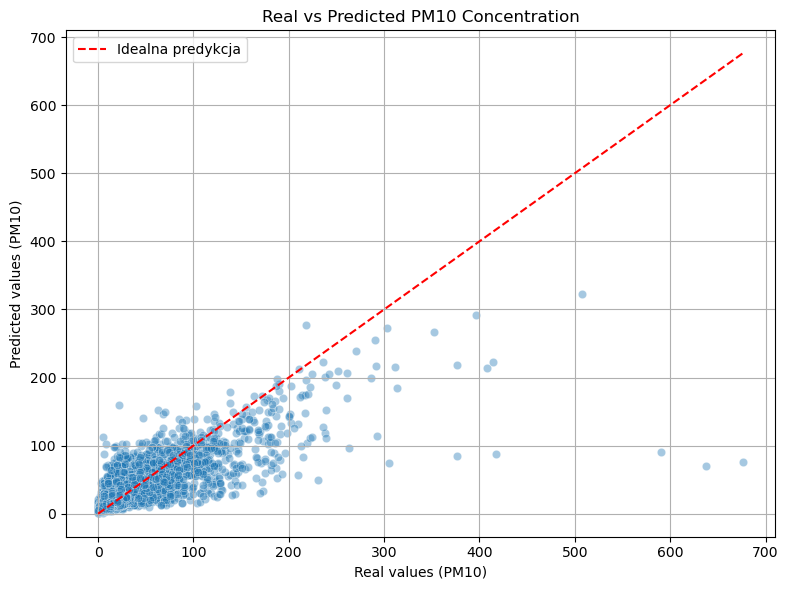

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tworzymy wykres scatter z linią idealnej predykcji
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)

# Linia idealna: predykcja == rzeczywistość
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Idealna predykcja')

plt.xlabel("Real values (PM10)")
plt.ylabel("Predicted values (PM10)")
plt.title("Real vs Predicted PM10 Concentration")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Last but not least, we can show the importance of features in the model

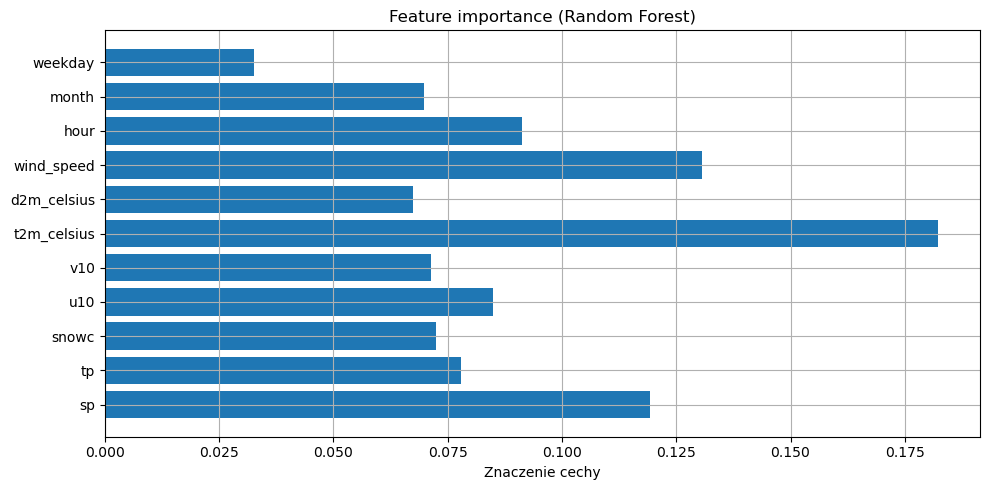

In [22]:

importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,5))
plt.barh(feature_names, importances)
plt.xlabel('Znaczenie cechy')
plt.title('Feature importance (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()
